- 1. Решите линейную систему уравнений

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
A = np.array([[1, 2, 3], [4, 0, 6], [7, 8, 9]])
B = np.array([12, 2, 1])
np.linalg.solve(A, B)

array([-9.2       ,  0.9       ,  6.46666667])

- 2. Найдите псевдорешение

In [5]:
A = np.array([[1, 2, -1], [3, -4, 0], [8, -5, 2], [2, -5, 0], [11, 4, -7]])
B = np.array([1, 7, 12, 7, 15])
np.linalg.lstsq(A, B)

C:\Users\Anatoly\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  This is separate from the ipykernel package so we can avoid doing imports until


(array([ 1.15601029, -0.889718  , -0.85029782]),
 array([0.66772534]),
 3,
 array([14.89650167, 10.4695886 ,  2.73531577]))

In [6]:
#Невязка: 0.667

3. Сколько решений имеет линейная система:

Если ноль – то измените вектор правой части так, чтобы система стала совместной, и решите ее. 

In [23]:
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
B = np.array([2, 5, 1])
C = np.c_[A,B.T]
np.linalg.matrix_rank(A, .0001), np.linalg.matrix_rank(C, .0001)

(2, 3)

Ранги матриц неравны, следовательно, решений СЛАУ не имеет. Во второй строке заменим "5" на "8" 

In [25]:
A = np.array([[1, 2, 3], [4, 8, 6], [7, 8, 9]])
B = np.array([2, 5, 1])
C = np.c_[A,B.T]
np.linalg.matrix_rank(A, .0001), np.linalg.matrix_rank(C, .0001)

(3, 3)

In [26]:
print(np.linalg.solve(A, B))

[-1.83333333  1.16666667  0.5       ]


4. Вычислите LU-разложение матрицы:

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.linalg

In [34]:
A = np.array([[1, 2, 3], 
              [2, 16, 21], 
              [4, 28, 73]])
P, L, U = scipy.linalg.lu(A)

In [38]:
print(P)
print(L)
print(U)

[[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]
[[ 1.    0.    0.  ]
 [ 0.25  1.    0.  ]
 [ 0.5  -0.4   1.  ]]
[[  4.    28.    73.  ]
 [  0.    -5.   -15.25]
 [  0.     0.   -21.6 ]]


In [37]:
print(np.dot(P,A) - np.dot(L,U))

[[ -2. -12. -52.]
 [  3.  26.  70.]
 [ -1. -14. -18.]]


In [41]:
B = np.array([12, 8, 9])
C = np.c_[A,B.T]
np.linalg.matrix_rank(A, .0001), np.linalg.matrix_rank(C, .0001)

(3, 3)

In [42]:
np.linalg.solve(A, B)

array([14.83796296, -0.90509259, -0.34259259])

5. Найдите нормальное псевдорешение недоопределенной системы:

Для этого определите функцию Q(x,y,z), равную норме решения, и найдите ее минимум. 

In [43]:
import numpy as np
import matplotlib.pyplot as plt

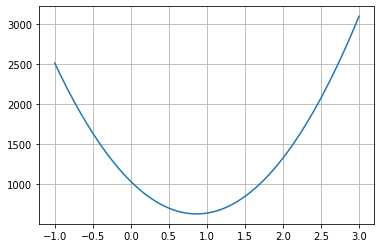

In [52]:
def Q(x, y, z):
    return(x**2 + y**2 + z**2)

x = np.linspace(-1, 3, 201)
plt.grid(True)
plt.plot(x, Q(x, 10*x + 14, 21*x - 29))

In [51]:
A = np.array([[1, 2, -1], [8, -5, 2]])
B = np.array([1, 12])
np.linalg.lstsq(A, B)

C:\Users\Anatoly\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  This is separate from the ipykernel package so we can avoid doing imports until


(array([ 1.38191882, -0.18081181,  0.0202952 ]),
 array([], dtype=float64),
 2,
 array([9.65316119, 2.41173777]))

6. Найдите одно из псевдорешений вырожденной системы:

Попробуйте также отыскать и нормальное псевдорешение.

In [53]:
A = np.array([[1,2,3], [4,5,6], [7,8,9]])
B = np.array([2,5,11])
Q, R = np.linalg.qr(A)

print(A)
print(Q)
print(R)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[-0.12309149  0.90453403  0.40824829]
 [-0.49236596  0.30151134 -0.81649658]
 [-0.86164044 -0.30151134  0.40824829]]
[[-8.12403840e+00 -9.60113630e+00 -1.10782342e+01]
 [ 0.00000000e+00  9.04534034e-01  1.80906807e+00]
 [ 0.00000000e+00  0.00000000e+00 -1.77635684e-15]]


In [54]:
R1 = R[:2, :2]
R1

array([[-8.1240384 , -9.6011363 ],
       [ 0.        ,  0.90453403]])

In [56]:
B1 = np.dot(np.transpose(Q), B)[:2]
B1

array([-1.21860576e+01,  8.43769499e-15])

In [58]:
X1 = np.linalg.solve(R1, B1)
X1

array([1.50000000e+00, 9.32822279e-15])

In [60]:
X = np.append(X1, 0)
print(X)
np.linalg.norm(X)

[1.50000000e+00 9.32822279e-15 0.00000000e+00]


1.4999999999999896

In [63]:
np.linalg.lstsq(A, B)

C:\Users\Anatoly\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


(array([ 1.25,  0.5 , -0.25]),
 array([], dtype=float64),
 2,
 array([1.68481034e+01, 1.06836951e+00, 1.47280825e-16]))